This is Assignment 2 of Winter Project - Data Science, Chemineers Sociey.

Aryan Nigam
220227

In the first part I have implemented Logistic Regression model from scratch as well as using Sklearn library, and have used Social Network Ads csv file for training and testing. I have used raw data, normalized data and scaled data for comparisons. Achieved about 0.8 accuracy with scratch model in normalized and scaled data and around 0.85 using in-built library.

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import operator
import seaborn as sns
from collections import Counter

In [2]:
# importing Social Ads csv for Logistic Regression
# data -> Social Network Ads
# iris data -> Iris Dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.info()
# changing gender values for MALE -> 1 and FEMALE -> 0
data.loc[data['Gender'] == 'Male', 'Gender'] = 1
data.loc[data['Gender'] == 'Female', 'Gender'] = 0
# defining variables
features = data['Age'].values
target = data['Purchased'].values
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
# equation = ax1 + bx2 + c
# helper function for using sigmoid function
def predict(X, b0, b1):
    return np.array([1 / (1 + np.exp(-1*b0 + -1*b1*x)) for x in X])
# defining my logistic regression model
def logistic_regression(feature_1,target_train):
    b0=np.random.random() # choosing random initial value for b0 and b1 parameters in between 0 and 1
    b1=np.random.random() # gives best result when b0 and b1 are not close to 0 or 1
    print(f'For initial value of b0={b0} and b1={b1}:')
    L = 0.0001 # learning rate
    epochs = 1000 # number of epochs(iterations)
    
    for epoch in range(epochs):
        target_predicted = predict(feature_1,b0,b1)
        D_b0 = -2 * sum((target_train - target_predicted) * target_predicted * (1 - target_predicted))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(feature_1 * (target_train - target_predicted) * target_predicted * (1 - target_predicted)) # Derivative of loss wrt b1
        # Update
        b0 = b0 - L*D_b0
        b1 = b1 - L*D_b1
        # b2 = b2 - L*D_b2

    return b0,b1

# helper function for checking accuracy
def checkAccuracy(pred,test):
   count=0
   a = []
   for i in range(len(pred)):
      if pred[i]==test[i]:
         count+=1
      else:
         a.append(i)
   print(f'The {len(a)} unmatched indexe(s) are {a}')
   return count/len(pred)

For initial value of b0=0.19753373776477 and b1=0.46585291417874986:


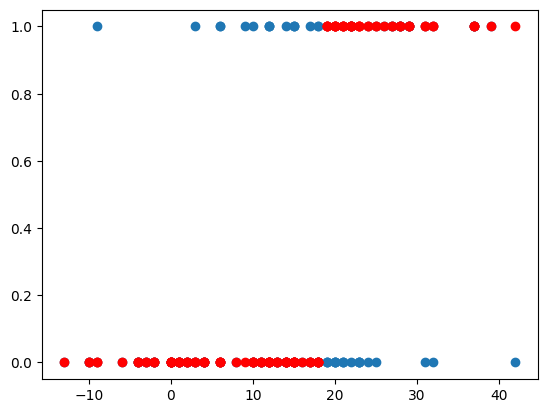

The unmatched indexe(s) are [1, 3, 5, 6, 10, 16, 22, 26, 27, 31, 32, 39, 40, 43, 67, 68, 69, 72, 76, 85, 88, 90, 91, 95, 97, 100, 101, 107, 110, 111, 112, 114, 115, 116, 117, 118]
The accuracy of the model 0.70


In [16]:
# using raw data
b0,b1 = logistic_regression(features_train,target_train)
predict_feature = predict(features_test,b0,b1)
predict_feature = [1 if value>=0.5 else 0 for value in predict_feature]
# plotting code
plt.clf()
plt.scatter(features_test, target_test)
plt.scatter(features_test, predict_feature, c="red")
plt.show()
# check accuracy
print((f'The accuracy of the model {checkAccuracy(target_test,predict_feature):.2f}'))

For initial value of b0=0.6849491757764968 and b1=0.22352496242512798:


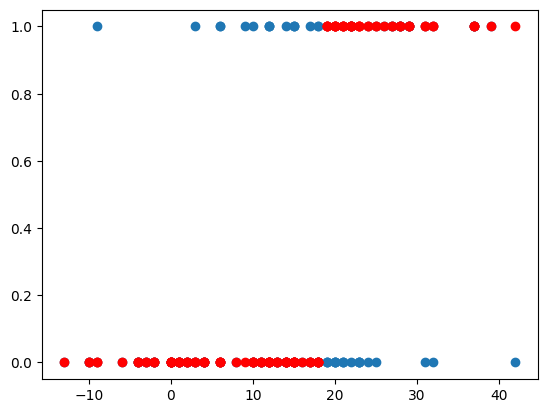

The 36 unmatched indexe(s) are [1, 3, 5, 6, 10, 16, 22, 26, 27, 31, 32, 39, 40, 43, 67, 68, 69, 72, 76, 85, 88, 90, 91, 95, 97, 100, 101, 107, 110, 111, 112, 114, 115, 116, 117, 118]
The accuracy of the model 0.70


In [5]:
# using normalize data          # variable having word 'norm' -> norm values
# normalize helper function
def normalize_func(X):
    for i in range(len(X)):
        X[i] = X[i]-np.mean(X)
    return X
# normalizing the data
features_train_norm,features_test_norm = normalize_func(features_train),normalize_func(features_test)
# running our model
b0_norm,b1_norm = logistic_regression(features_train_norm,target_train)
predict_feature_norm = predict(features_test_norm,b0_norm,b1_norm)
predict_feature_norm = [1 if value>=0.5 else 0 for value in predict_feature_norm]
# plotting code
plt.clf()
plt.scatter(features_test_norm, target_test)
plt.scatter(features_test_norm, predict_feature_norm, c="red")
plt.show()
# check accuracy
print((f'The accuracy of the model {checkAccuracy(target_test,predict_feature_norm):.2f}'))

For initial value of b0=0.07281358533902327 and b1=0.2846258210271927:


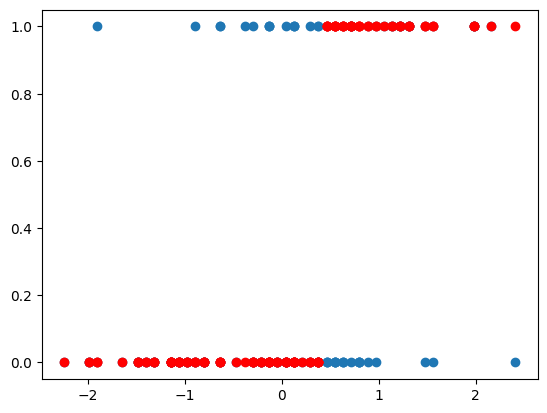

The 34 unmatched indexe(s) are [1, 3, 5, 6, 10, 16, 22, 26, 27, 31, 32, 33, 39, 40, 43, 67, 69, 72, 76, 85, 90, 91, 95, 97, 100, 107, 110, 111, 112, 114, 115, 116, 117, 118]
The accuracy of the model 0.72


In [6]:
# using standardize data
# standardize helper function
from sklearn.preprocessing import scale
# normalizing the data
features_train_scaled,features_test_scaled = scale(features_train),scale(features_test)
# running our model
b0_scaled,b1_scaled = logistic_regression(features_train_scaled,target_train)
predict_feature_scaled = predict(features_test_scaled,b0_scaled,b1_scaled)
predict_feature_scaled = [1 if value>=0.5 else 0 for value in predict_feature_scaled]
# plotting code
plt.clf()
plt.scatter(features_test_scaled, target_test)
plt.scatter(features_test_scaled, predict_feature_norm, c="red")
plt.show()
# check accuracy
print((f'The accuracy of the model {checkAccuracy(target_test,predict_feature_scaled):.2f}'))

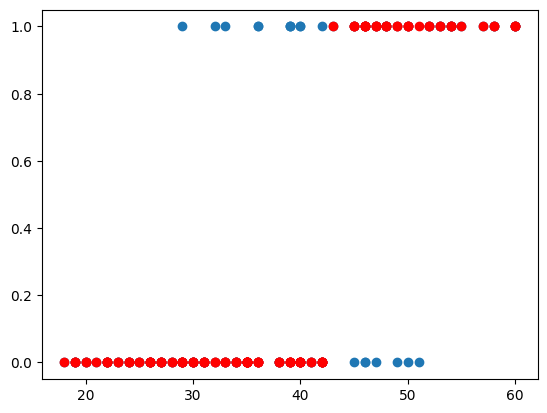

The 18 unmatched indexe(s) are [4, 16, 23, 31, 36, 37, 38, 39, 45, 54, 76, 81, 82, 85, 94, 99, 107, 111]
The accuracy of the model 0.85


In [7]:
# using sklearn inbuilt functions
from sklearn.linear_model import LogisticRegression
X = data.drop(['Purchased','User ID','Gender','EstimatedSalary'],axis=1)
Y = data['Purchased']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
log_regr = LogisticRegression().fit(X_train,Y_train)
prediction = log_regr.predict(X_test)
# plotting code
plt.clf()
plt.scatter(X_test, Y_test)
plt.scatter(X_test, prediction, c="red")
plt.show()
# check accuracy
Y_test = np.asarray(Y_test)
print((f'The accuracy of the model {checkAccuracy(Y_test,prediction):.2f}'))

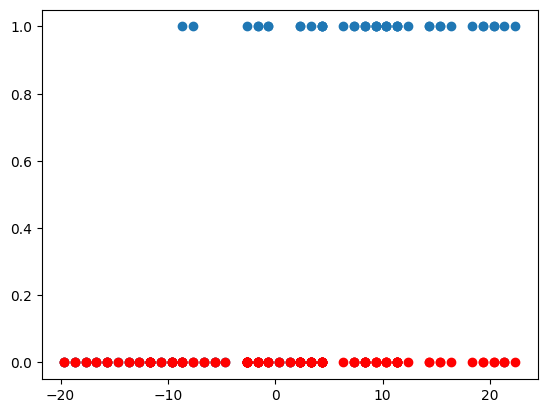

The 45 unmatched indexe(s) are [1, 4, 5, 6, 7, 10, 12, 17, 20, 21, 23, 32, 34, 39, 40, 43, 45, 46, 49, 50, 51, 52, 53, 58, 59, 60, 65, 67, 68, 70, 72, 73, 80, 81, 84, 91, 92, 93, 97, 99, 102, 105, 107, 111, 114]
The accuracy of the model 0.62


In [8]:
# using sklearn inbuilt functions
# defining in-built functions
from sklearn.linear_model import LogisticRegression
X = data.drop(['Purchased','User ID','Gender','EstimatedSalary'],axis=1)
Y = data['Purchased']
# normalizing data
X_norm = pd.DataFrame(pd.Series(normalize_func([X])))
X_train_norm,X_test_norm,Y_train,Y_test = train_test_split(X_norm[0][0],Y,test_size=0.3)
log_regr_norm = LogisticRegression().fit(X_train_norm,Y_train)
prediction_norm = log_regr.predict(X_test_norm)
# plotting code
plt.clf()
plt.scatter(X_test_norm, Y_test)
plt.scatter(X_test_norm, prediction_norm, c="red")
plt.show()
# check accuracy
Y_test = np.asarray(Y_test)
print((f'The accuracy of the model {checkAccuracy(Y_test,prediction_norm):.2f}'))

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


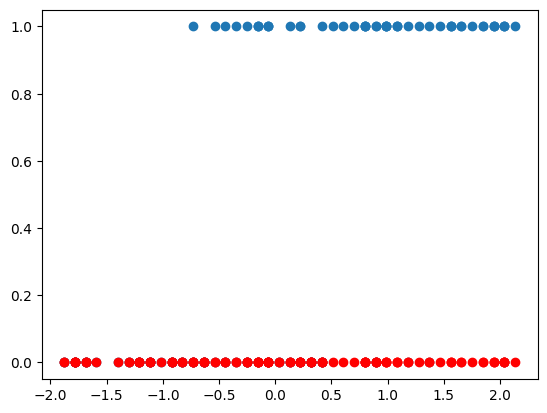

The 50 unmatched indexe(s) are [0, 1, 3, 4, 6, 7, 8, 9, 14, 19, 20, 21, 22, 23, 28, 34, 36, 38, 39, 43, 44, 45, 47, 50, 56, 57, 58, 59, 60, 62, 64, 65, 70, 72, 75, 80, 84, 85, 86, 87, 88, 94, 96, 97, 109, 110, 113, 114, 117, 118]
The accuracy of the model 0.58


In [9]:
# using sklearn inbuilt functions
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
X = data.drop(['Purchased','User ID','Gender','EstimatedSalary'],axis=1)
Y = data['Purchased']
# scaling the data
X_scaled = scale(X)
X_train_scaled,X_test_scaled,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.3)
log_regr_scaled = LogisticRegression().fit(X_train_scaled,Y_train)
prediction_scaled = log_regr.predict(X_test_scaled)
# plotting code
plt.clf()
plt.scatter(X_test_scaled, Y_test)
plt.scatter(X_test_scaled, prediction_scaled, c="red")
plt.show()
# check accuracy
Y_test = np.asarray(Y_test)
print((f'The accuracy of the model {checkAccuracy(Y_test,prediction_scaled):.2f}'))

In second part, I have implemented KNN on Iris dataset from scratch and achieved accuracy of 0.977 which is equal to the in-built library accuracy

In [18]:
# now KNN
iris_data = pd.read_csv('Iris.csv')
iris_data = iris_data.drop('Id',axis=1)
iris_data.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


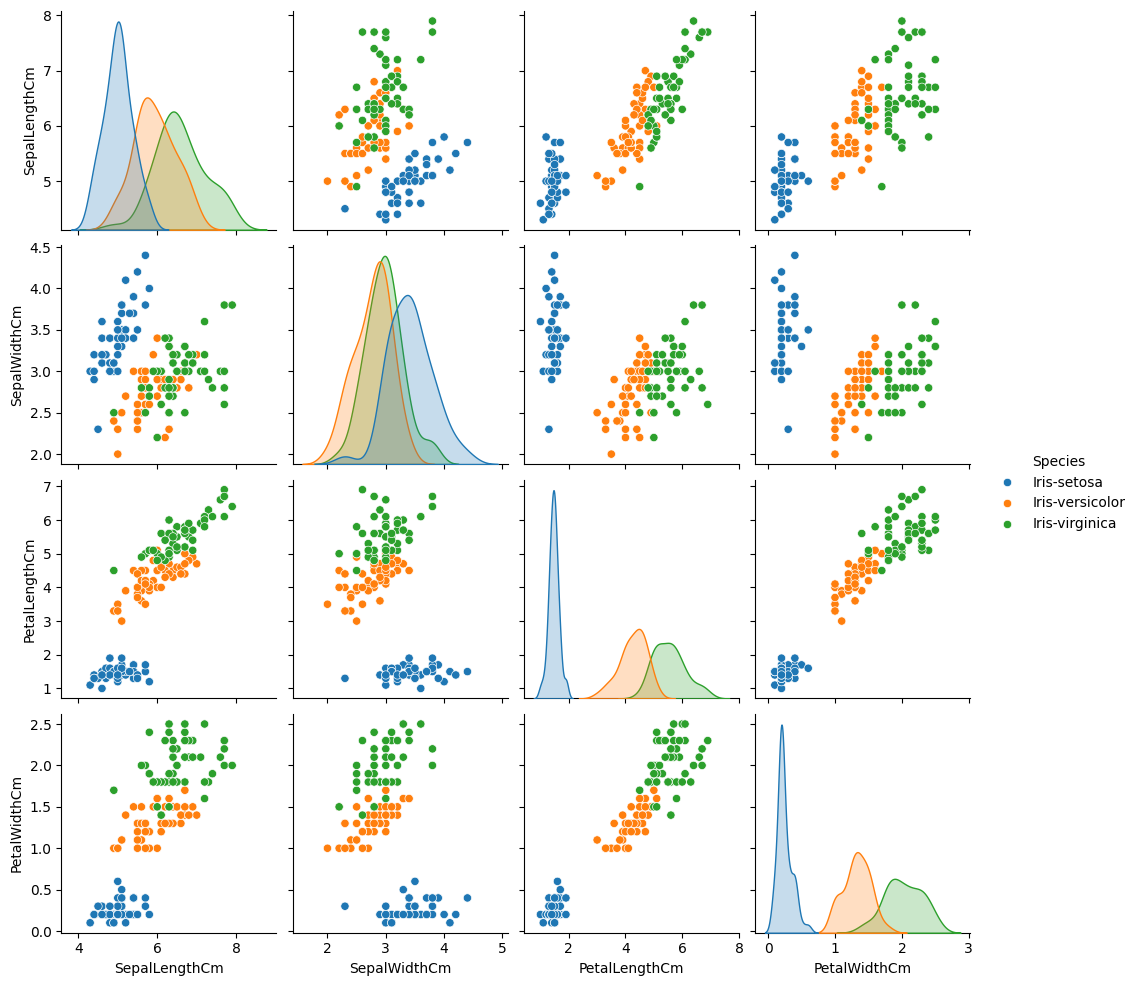

In [19]:
# using sns library to plot all parameters v/s other parameters
sns.pairplot(iris_data, hue ='Species')

In [11]:
# defining target and data variables
iris_target = iris_data.iloc[:,-1] # selecting last column for species name
iris_data = iris_data.drop('Species',axis=1) # removing last column containing name
iris_target = [0 if x=='Iris-setosa' else x for x in iris_target]       # 'setosa'->0
iris_target = [1 if x == 'Iris-versicolor' else x for x in iris_target] # 'versicolor'->1
iris_target = [2 if x == 'Iris-virginica' else x for x in iris_target]  # 'virginica'->2
iris_data,iris_target = np.asarray(iris_data),np.asarray(iris_target) # converting dataframe to np array
iris_data_train,iris_data_test,iris_target_train,iris_target_test = train_test_split(iris_data,iris_target,test_size=0.3,random_state=1)

In [20]:
# helper function for euclidean distance
def distance_ecu(x_train, x_test_point):
  distances= []
  for i in range(len(x_train)):
      current_train_point= x_train[i]
      current_distance= 0
      for j in range(len(current_train_point)): 
          current_distance += (current_train_point[j] - x_test_point[j]) **2
      current_distance= np.sqrt(current_distance)
      distances.append(current_distance)
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances
# helper function for nearest neighbors using distances
def nearest_neighbors(distance_point, K):
    neighbors= distance_point.sort_values(by=['dist'], axis=0)
    neighbors= neighbors[:K]
    return neighbors
# helper function for counting number of occurences using in-built dict function Counter
def voting(neighbors, y_train):
    # Using the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[neighbors.index])
    y_pred= counter_vote.most_common()[0][0]   # Majority Voting
    return y_pred
# KNN model
def KNN_from_scratch(x_train, y_train, x_test, K):
    y_pred=[]
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)   # Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  # Step 2
      y_pred_point    = voting(df_nearest_point, y_train)     # Step 3
      y_pred.append(y_pred_point)
    # for minima on calidation curve
    distance_point_min = np.min(distance_point)
    k_value = (distance_point.index)+1
    min_index = (distance_point.index+1)[distance_point['dist']==distance_point_min].tolist()
    # plotting code
    plt.figure(figsize=(10,10))
    plt.plot(min_index,distance_point_min,'r*')
    # to mark minima point
    plt.annotate(f'Minima=({min_index[0]},{distance_point_min:0.2f})',(min_index[0],distance_point_min),(min_index[0]+2,distance_point_min-0.05))
    plt.plot(k_value,distance_point,alpha=0.5)
    plt.xlabel('K value')
    plt.ylabel('Distance of neighbors')
    plt.show()
    return y_pred,min_index[0]  # gives prediction and ideal minima
# helper function to check accuracy
def checkAccuracy(pred,test):
   count=0
   a = []
   for i in range(len(pred)):
      if pred[i]==test[i]:
         count+=1
      else:
         a.append(i)
   print(f'The unmatched indexe(s) are {a}')
   return count/len(pred)

For K-value of 42, the model is:


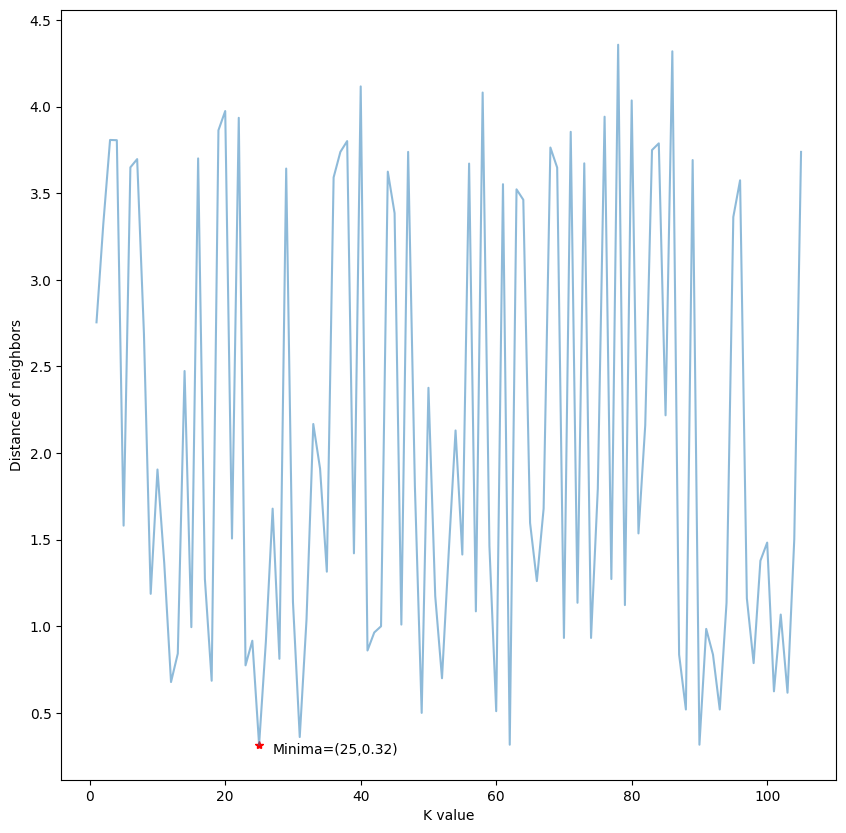

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1]
The unmatched indexe(s) are [22, 42]
The accuracy of the model on K-value of 42 is 0.96
The minima is obtained at K-value of 25


In [21]:
# starting KNN model with a random initialized K to predict ideal minima through validation curve
K=np.random.randint(1,len(iris_target_train))
print(f'For K-value of {K}, the model is:')
y_pred_scratch,K_ideal= KNN_from_scratch(iris_data_train, iris_target_train, iris_data_test, K)
print(y_pred_scratch)
print(f'The accuracy of the model on K-value of {K} is {checkAccuracy(y_pred_scratch,iris_target_test):.2f}')
print(f'The minima is obtained at K-value of {K_ideal}')

For ideal K-value of 25, the model is:


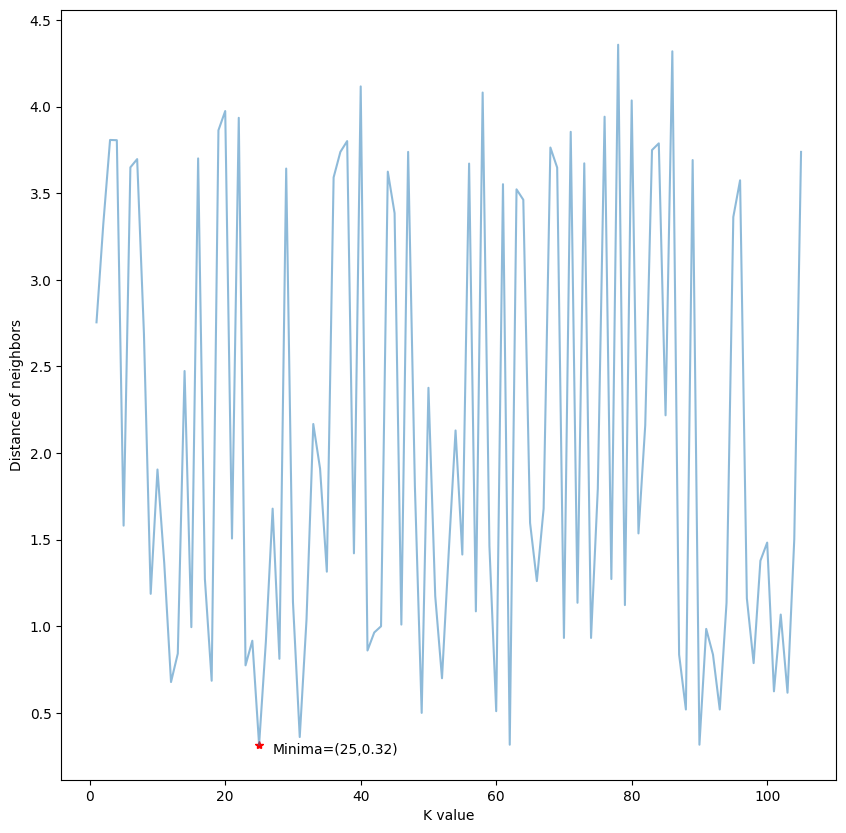

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]
The unmatched indexe(s) are [22]
The accuracy of the model on K-value of 25 is 0.98


In [22]:
# extracting and using ideal K-value
K=K_ideal
print(f'For ideal K-value of {K_ideal}, the model is:')
y_pred_scratch,K_ideal= KNN_from_scratch(iris_data_train, iris_target_train, iris_data_test, K)
print(y_pred_scratch)
print(f'The accuracy of the model on K-value of {K} is {checkAccuracy(y_pred_scratch,iris_target_test):.2f}')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 25)
knn_sklearn = KNeighborsClassifier(n_neighbors=25)
# Fitting the model
knn_sklearn.fit(iris_data_train,iris_target_train)
# Predicting the test results
iris_sklearn_pred = knn_sklearn.predict(iris_data_test)
# check accuracy
print((f'The accuracy of the model {checkAccuracy(iris_target_test,iris_sklearn_pred):.2f}'))

The unmatched indexe(s) are [22]
The accuracy of the model 0.98
